In [ ]:
!pip install zarr

In [7]:
import os
import zarr
import matplotlib.pyplot as plt

In [2]:
def display_tree(root_dir, indent=""):
    print(indent + os.path.basename(root_dir) + "/")
    indent += "    "
    
    try:
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                display_tree(item_path, indent)
            else:
                print(indent + item)
                
    except PermissionError:
        print(indent + "[Access Denied]")

In [3]:
dir0="./kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4"
display_tree(dir0)


TS_5_4/
    Picks/
        ribosome.json
        virus-like-particle.json
        beta-galactosidase.json
        beta-amylase.json
        apo-ferritin.json
        thyroglobulin.json


In [4]:
paths=[]
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
paths

['./kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/ribosome.json',
 './kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/virus-like-particle.json',
 './kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/beta-galactosidase.json',
 './kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/beta-amylase.json',
 './kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/apo-ferritin.json',
 './kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_5_4/Picks/thyroglobulin.json']

In [8]:
import json

def load_from_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

from collections import defaultdict
cnt = defaultdict(int)
L=[]
for i,path in enumerate(paths):
    data=load_from_json(path)
    cnt[i]=data['pickable_object_name']
    X=[]
    Y=[]
    Z=[]
    Z2=[]
    for datai in data['points']:
        xyz=datai['location']
        X+=[xyz['x']]
        Y+=[xyz['y']]
        Z+=[xyz['z']]
        Z2+=[xyz['z']//170]
    L+=[(i,X,Y,Z,Z2)]

cnt

defaultdict(int,
            {0: 'ribosome',
             1: 'virus-like-particle',
             2: 'beta-galactosidase',
             3: 'beta-amylase',
             4: 'apo-ferritin',
             5: 'thyroglobulin'})

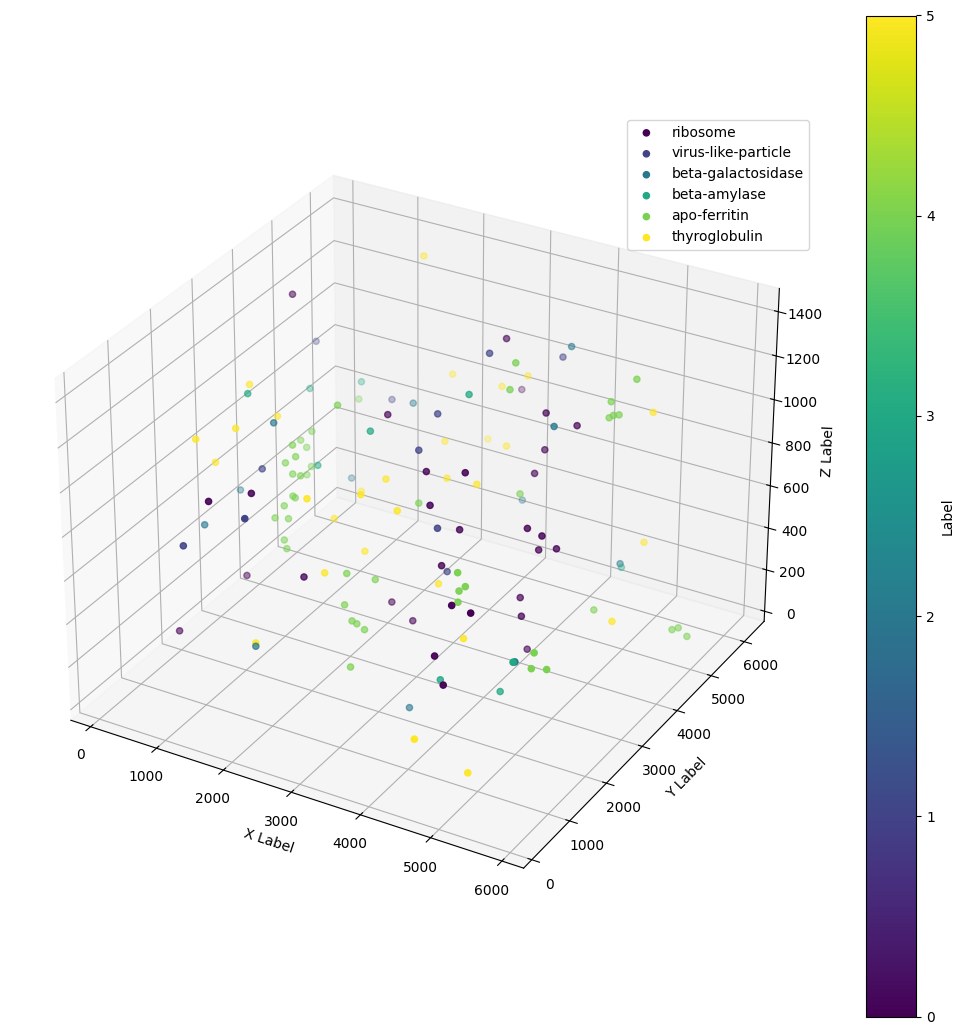

In [6]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

for data in L:
    i, X, Y, Z, Z2 = data  
    scatter = ax.scatter(X, Y, Z, c=[i]*len(X), vmin=0, vmax=5, cmap='viridis', label=cnt[i]) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Label')
ax.legend()
plt.show()

In [79]:
dir0='./kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000'

In [81]:

num = 0
files=os.listdir(dir0)
ZARR=[]
for file in files:
    ZARR+=[os.path.join(dir0,file)]
    
ZARR 

['./kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/isonetcorrected.zarr',
 './kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/wbp.zarr',
 './kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr',
 './kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/ctfdeconvolved.zarr']

In [ ]:
import zarr
import matplotlib.pyplot as plt
num = 0
# 단일 디렉토리/이미지 확인
dir = ZARR[num]
data = zarr.open(dir, mode='r')

# 단일 이미지 가져오기 (예: 첫 번째 이미지)
image = data[0][0]  # 첫 번째 이미지

# 이미지 정보 출력
print(f"Directory: {dir.split('/')[-1]}")
for i in range(len(data)):
    print(f"data {i} shape: {data[i].shape}")
print(f"Image shape: {image.shape}")
print(f"Data type: {image.dtype}")

# 이미지 시각화
plt.figure(figsize=(8, 8))
plt.axis('off')

# 이미지 정규화 및 표시
min_val, max_val = image.min(), image.max()
normalized_image = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')
plt.imshow(normalized_image)
plt.show()

In [100]:
# 일반적인 Zarr 데이터셋 구조 확인
import zarr
import numpy as np

# 예시 디렉토리의 데이터 확인
data = zarr.open(ZARR[0], mode='r')

print("=== Zarr 데이터 구조 ===")
print(f"데이터 키 목록: {list(data.keys())}")  # 최상위 그룹의 키들

# 각 키별 데이터 shape 확인
for key in data.keys():
    print(f"\n{key} 데이터:")
    print(f"└─ Shape: {data[key].shape}")
    print(f"└─ Type: {data[key].dtype}")

print("\n=== 예시 데이터 값 범위 ===")
# 첫 번째 키의 데이터 범위 확인
first_key = list(data.keys())[0]
sample_data = data[first_key]
print(f"최소값: {np.min(sample_data)}")
print(f"최대값: {np.max(sample_data)}")

=== Zarr 데이터 구조 ===
데이터 키 목록: ['0', '1', '2']

0 데이터:
└─ Shape: (184, 630, 630)
└─ Type: float32

1 데이터:
└─ Shape: (92, 315, 315)
└─ Type: float32

2 데이터:
└─ Shape: (46, 158, 158)
└─ Type: float32

=== 예시 데이터 값 범위 ===
최소값: -18.391653060913086
최대값: 4.828106880187988


In [ ]:

for j, dir in enumerate(ZARR[num:num+1]):
    print(ZARR[num].split('/')[-1])
    data = zarr.open(dir, mode='r')
    fig = plt.figure(figsize=(12, 20))

    for i in range(92):
        ax = plt.subplot(10, 10, i + 1)
        plt.axis('off')
        image = data[1][i]
        min_val, max_val = image.min(), image.max()
        simage = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')
        plt.imshow(simage, cmap='gray')
    plt.show()


In [ ]:

for j, dir in enumerate(ZARR[num:num+1]):
    print(ZARR[num].split('/')[-1])
    data = zarr.open(dir, mode='r')
    fig = plt.figure(figsize=(12, 20))

    for i in range(46):
        ax = plt.subplot(10, 10, i + 1)
        plt.axis('off')
        image = data[2][i]
        min_val, max_val = image.min(), image.max()
        simage = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')
        plt.imshow(simage)
    plt.show()
